In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt

import warnings
warnings.filterwarnings("ignore")

### Extract RGB Channels

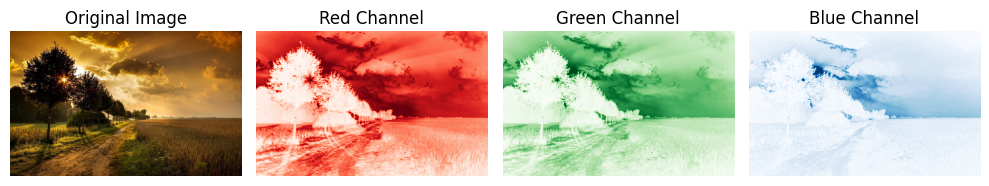

In [2]:
# Load image
image = cv2.imread('image.jpg')

# Convert to RGB and split channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(image_rgb)

# Display original and channels using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")
plt.subplot(1, 4, 2)
plt.imshow(R, cmap='Reds')
plt.axis('off')
plt.title("Red Channel")
plt.subplot(1, 4, 3)
plt.imshow(G, cmap='Greens')
plt.axis('off')
plt.title("Green Channel")
plt.subplot(1, 4, 4)
plt.imshow(B, cmap='Blues')
plt.axis('off')
plt.title("Blue Channel")
plt.tight_layout()
plt.show()

### Image Resizing and PSNR Calculation

#### Helper Function for PSNR

In [3]:
def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * log10(255 / sqrt(mse))

#### Nearest Neighbor, Bilinear, and Bicubic Interpolation

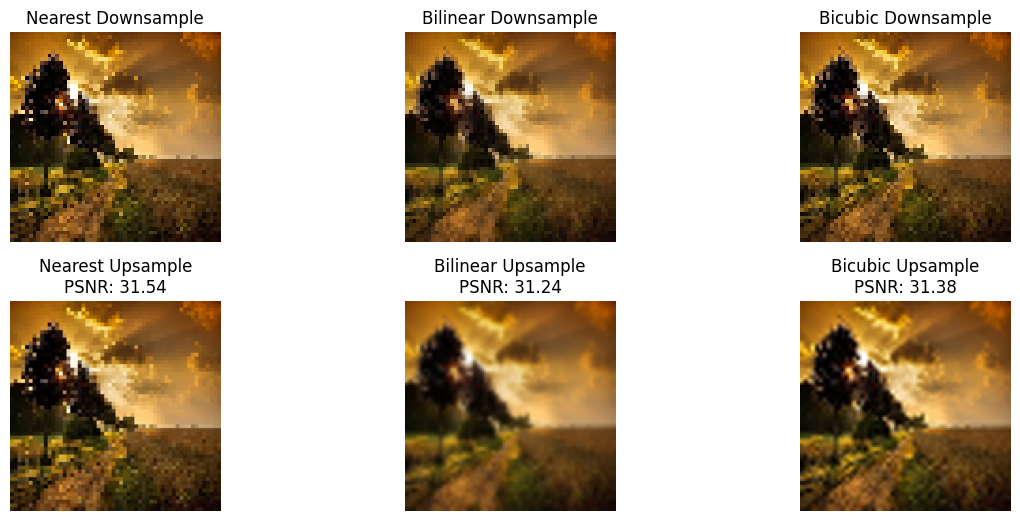

In [4]:
# Resize image to 112x112
square_image = cv2.resize(image_rgb, (112, 112))

# Downsample and upsample using different methods
methods = {'Nearest': cv2.INTER_NEAREST, 'Bilinear': cv2.INTER_LINEAR, 'Bicubic': cv2.INTER_CUBIC}
results = {}

plt.figure(figsize=(12, 8))

for i, (method_name, interpolation) in enumerate(methods.items(), start=1):
    # Downsample
    down_image = cv2.resize(square_image, (56, 56), interpolation=interpolation)
    # Upsample
    up_image = cv2.resize(down_image, (112, 112), interpolation=interpolation)
    # PSNR
    psnr = calculate_psnr(square_image, up_image)
    results[method_name] = psnr
    
    # Display results
    plt.subplot(3, len(methods), i)
    plt.imshow(down_image)
    plt.axis('off')
    plt.title(f"{method_name} Downsample")
    
    plt.subplot(3, len(methods), i + len(methods))
    plt.imshow(up_image)
    plt.axis('off')
    plt.title(f"{method_name} Upsample\nPSNR: {psnr:.2f}")

plt.tight_layout()
plt.show()

### Intensity Transformations

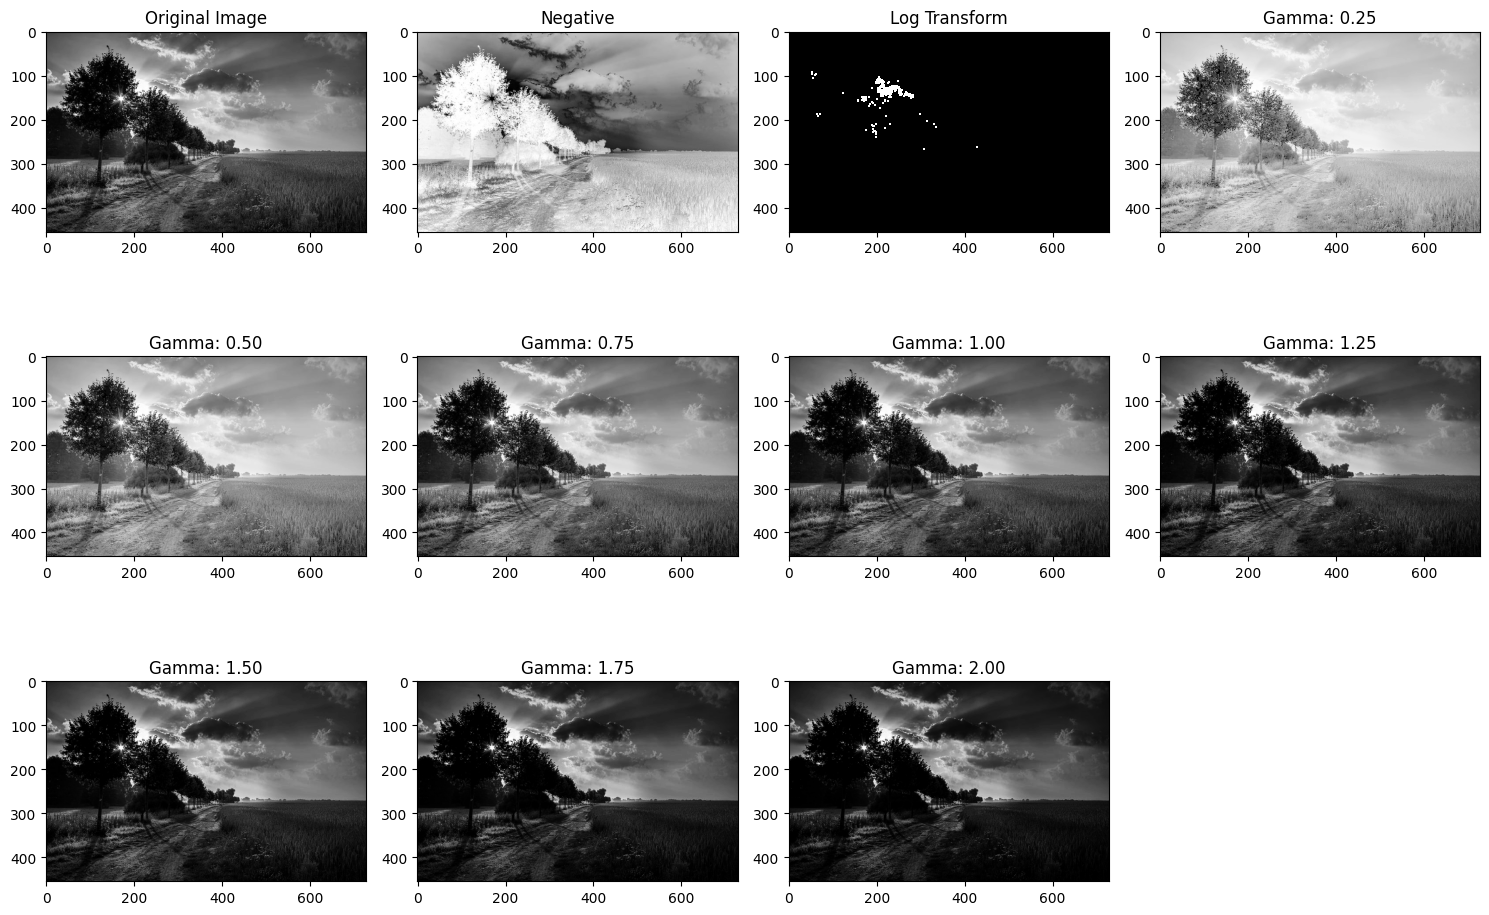

In [5]:
# Load grayscale image
gray_image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Transformations
negative = 255 - gray_image
log_transform = (255 / np.log(1 + np.max(gray_image))) * np.log(1 + gray_image)
gamma_values = np.arange(0.25, 2.25, 0.25)
gamma_images = [np.clip((gray_image / 255.0) ** gamma * 255, 0, 255).astype(np.uint8) for gamma in gamma_values]

# Display results
plt.figure(figsize=(15, 10))

# Original and negative
plt.subplot(3, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.subplot(3, 4, 2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")

# Log transformation
plt.subplot(3, 4, 3)
plt.imshow(log_transform, cmap='gray')
plt.title("Log Transform")

# Gamma corrections
for i, (gamma, gamma_image) in enumerate(zip(gamma_values, gamma_images), start=4):
    plt.subplot(3, 4, i)
    plt.imshow(gamma_image, cmap='gray')
    plt.title(f"Gamma: {gamma:.2f}")

plt.tight_layout()
plt.show()


### Bit Plane Slicing

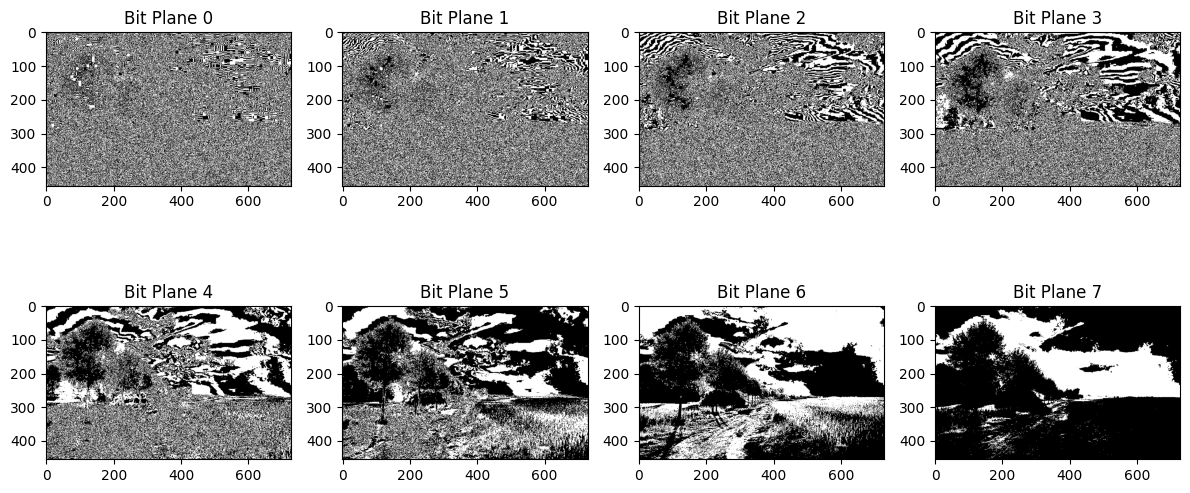

In [6]:
# Load grayscale image
gray_image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Extract bit planes
bit_planes = [(gray_image & (1 << i)) >> i for i in range(8)]

# Display bit planes
plt.figure(figsize=(12, 6))
for i, plane in enumerate(bit_planes):
    plt.subplot(2, 4, i + 1)
    plt.imshow(plane * 255, cmap='gray')
    plt.title(f"Bit Plane {i}")

plt.tight_layout()
plt.show()